## Handling Missing Values using Arbitrary Method

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [20]:
df=pd.read_csv('csv/titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [21]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [22]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [24]:
x_train['Age_99']=x_train['Age'].fillna(99)
x_train['Age_-1']=x_train['Age'].fillna(-1)
x_train['Fare_99']=x_train['Fare'].fillna(99)
x_train['Fare_-1']=x_train['Fare'].fillna(-1)

In [25]:
print(x_train['Age'].var(),'|',x_train['Age_99'].var(),'|',x_train['Age_-1'].var())
print(x_train['Fare'].var(),'|',x_train['Fare_99'].var(),'|',x_train['Fare_-1'].var())

210.4528692463678 | 917.6372579490381 | 319.3288446599537
2378.850836641955 | 2475.3181237982662 | 2308.7854503944995


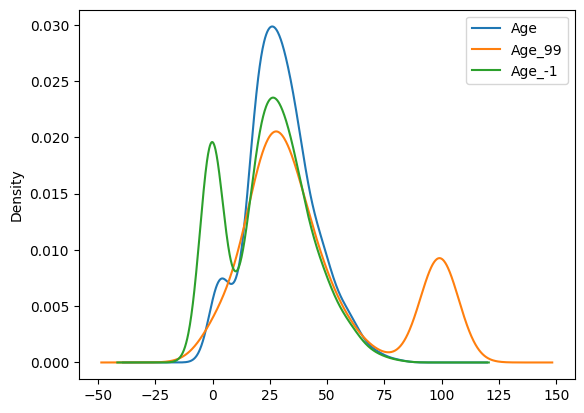

In [26]:
fig=plt.figure()
ax=fig.add_subplot()

x_train['Age'].plot(kind='kde',ax=ax)
x_train['Age_99'].plot(kind='kde',ax=ax)
x_train['Age_-1'].plot(kind='kde',ax=ax)

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

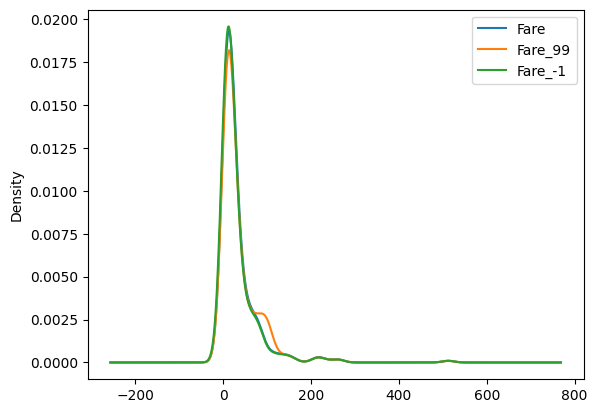

In [27]:
fig=plt.figure()
ax=fig.add_subplot()

x_train['Fare'].plot(kind='kde',ax=ax)
x_train['Fare_99'].plot(kind='kde',ax=ax)
x_train['Fare_-1'].plot(kind='kde',ax=ax)

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [28]:
x_train.cov()

,Age,Fare,Family,Age_99,Age_-1,Fare_99,Fare_-1
Age,210.452869,88.495367,-6.086107,210.452869,210.452869,84.436617,83.065256
Fare,88.495367,2378.850837,17.556587,-33.742505,117.936978,2378.850837,2378.850837
Family,-6.086107,17.556587,2.844782,-4.110411,-5.256458,16.249409,16.813787
Age_99,210.452869,-33.742505,-4.110411,917.637258,-165.272555,-41.637520,-27.089101
Age_-1,210.452869,117.936978,-5.256458,-165.272555,319.328845,117.078413,108.969119
Fare_99,84.436617,2378.850837,16.249409,-41.637520,117.078413,2475.318124,2140.829871
Fare_-1,83.065256,2378.850837,16.813787,-27.089101,108.969119,2140.829871,2308.785450


In [29]:
x_train.corr()

,Age,Fare,Family,Age_99,Age_-1,Fare_99,Fare_-1
Age,1.000000,0.118049,-0.287479,1.000000,1.000000,0.111705,0.113169
Fare,0.118049,1.000000,0.210147,-0.022731,0.134772,1.000000,1.000000
Family,-0.287479,0.210147,1.000000,-0.080450,-0.174401,0.193641,0.207467
Age_99,1.000000,-0.022731,-0.080450,1.000000,-0.305314,-0.027627,-0.018611
Age_-1,1.000000,0.134772,-0.174401,-0.305314,1.000000,0.131687,0.126909
Fare_99,0.111705,1.000000,0.193641,-0.027627,0.131687,1.000000,0.895519
Fare_-1,0.113169,1.000000,0.207467,-0.018611,0.126909,0.895519,1.000000


## Sklearn

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [31]:
si1=SimpleImputer(strategy='constant',fill_value=99)
si2=SimpleImputer(strategy='constant',fill_value=999)

In [32]:
trf=ColumnTransformer([
    ('i1',si1,['Age']),
    ('i2',si1,['Fare'])
],remainder='passthrough')

In [33]:
trf.fit(x_train)
x_train=trf.transform(x_train)
x_test=trf.transform(x_test)